In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # Normalized the images in o and 1
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
x_train = x_train[:30000]
x_test = x_test[:10000]

In [ ]:
# Define the architecture of the autoancoder
#encoding_dim = 32
#input_img = input(shape=(784,))

In [ ]:
from tensorflow.keras.layers import Input, Dense

In [ ]:
# encoding_dim = 32
# input_img = Input(shape=(784,))
# encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded = Dense(784, activation='sigmoid')(encoded)
# autoencoder = Model(input_img, decoded)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
encoding_dim = 16 # Dimensions
input_img = Input(shape=(784,))  # input layer
encoded = Dense(encoding_dim, activation='relu')(input_img)  #encoder layer
decoded = Dense(784, activation='sigmoid')(encoded) #decoder layer
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# train the autoencoder
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=300,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.5249 - val_loss: 0.2671
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2599 - val_loss: 0.2305
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2243 - val_loss: 0.2031
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2003 - val_loss: 0.1890
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1870 - val_loss: 0.1782
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1771 - val_loss: 0.1688
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1674 - val_loss: 0.1613
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1612 - val_loss: 0.1557
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1544 - val_loss: 0.1513
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1510 - val_loss: 0.1479


In [ ]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=300,
                shuffle=True,
                validation_data=(x_test, x_test))

Test loss: 0.14789807796478271


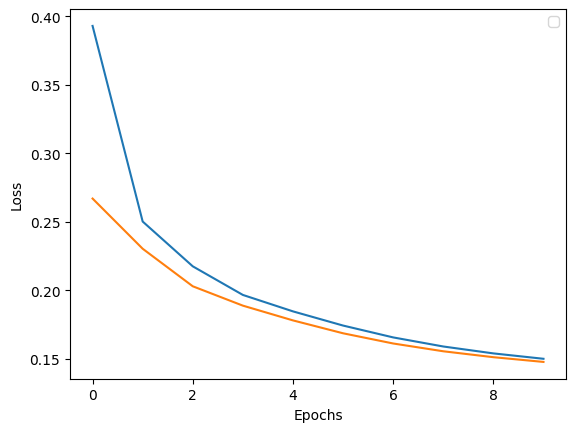

In [ ]:
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
reconstructed_images = autoencoder.predict(x_test) # generate recustruct image


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
reconstructed_images = reconstructed_images.reshape((len(reconstructed_images), 28, 28))
x_test_original = x_test.reshape((len(x_test), 28, 28))


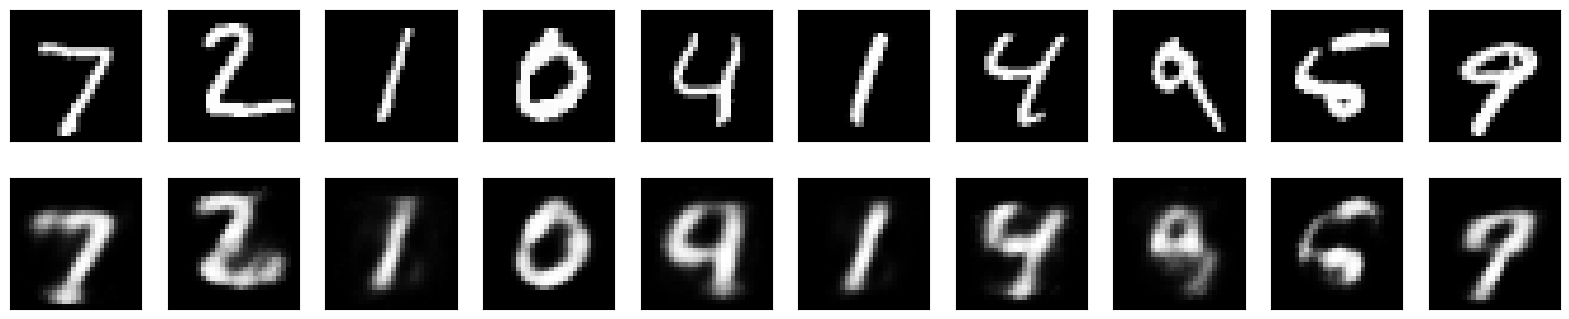

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()